In [1]:
!pip install geemap

In [2]:
import hydrofunctions as hf
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import folium
import geemap.foliumap as geemap
import ee
import matplotlib.dates as mdates
import hydrofns
import calendar
import pandas as pd

%matplotlib inline

In [3]:
ee.Authenticate()
ee.Initialize()

Enter verification code: 4/1AX4XfWi0000ReOsaV6aWHQJGMnRmA-XWWBNFuSYXnoApaPI6GJKLJDJh8F8

Successfully saved authorization token.


In [4]:
# site number for NWIS gage (Vicksburg MS Site)
vicksburg = ['07289000']

# Coordinates for the bounds of a rectangle at Vicksburg MS
vicksburg_xMin = -91.2
vicksburg_yMin = 32
vicksburg_xMax = -90.8
vicksburg_yMax = 32.7

# Vicksburg geometry
vicksburg_rectangleGeoJSON = ee.Geometry.Rectangle(
    [
        [vicksburg_xMin, vicksburg_yMin],
        [vicksburg_xMax, vicksburg_yMax]   # max x and y
    ]
)


vicksburg_bnds = ee.FeatureCollection([
    ee.Feature(
        vicksburg_rectangleGeoJSON,
        {'name': 'Mississippi Vicksburg', 'fill': 1}),
])

# Palettes for Visualization
trueColor_palette = {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 3000}
waterPalette = ['red', 'yellow', 'green', 'blue']

# Import the Sentinel 2 collection as sentinel 2
sentinel2 = ee.ImageCollection(
    'COPERNICUS/S2_SR').filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10))

In [5]:
def get_water_pixel_count(bounds, start, end):
    """
    Add docstring here.
    """
    ndwi_threshold = 0    
    sentinel_image = sentinel2.filterBounds(
        bounds).filterDate(start, end).mosaic().clip(bounds)
    ndwi_image = sentinel_image.normalizedDifference(['B3', 'B8'])
    water_pixel_image = ndwi_image.gt(ndwi_threshold).selfMask()

    pixel_count_dict = water_pixel_image.reduceRegion(**{
        'reducer': ee.Reducer.count(),
        'geometry': bounds.geometry(),
        'scale': 10,
        'maxPixels': 1e9})
    pixel_count = pixel_count_dict.getInfo()    
    
    
    return pixel_count



In [19]:
# Need to figure out how to iterate through months with function
# Need to figure out how to iterate through months with function
vb_jan = get_water_pixel_count(vicksburg_bnds, '2019-01-01', '2019-01-30')
#vb_feb = get_water_pixel_count(vicksburg_bnds, '2019-02-01', '2019-02-28')
vb_mar = get_water_pixel_count(vicksburg_bnds, '2019-03-01', '2019-03-30')
vb_apr = get_water_pixel_count(vicksburg_bnds, '2019-04-01', '2019-04-30')
vb_may = get_water_pixel_count(vicksburg_bnds, '2019-05-01', '2019-05-30')
#vb_jun = get_water_pixel_count(vicksburg_bnds, '2019-06-01', '2019-06-30')
vb_jul = get_water_pixel_count(vicksburg_bnds, '2019-07-01', '2019-07-31')
vb_aug = get_water_pixel_count(vicksburg_bnds, '2019-08-01', '2019-08-30')
vb_sep = get_water_pixel_count(vicksburg_bnds, '2019-09-01', '2019-09-30')
vb_oct = get_water_pixel_count(vicksburg_bnds, '2019-10-01', '2019-10-30')
vb_nov = get_water_pixel_count(vicksburg_bnds, '2019-11-01', '2019-11-30')
vb_dec = get_water_pixel_count(vicksburg_bnds, '2019-12-01', '2019-12-31')
vb_feb = {'nd': None}
vb_jun = {'nd': None}
#  vb_feb = {'nd': ((vb_jan['nd'] + vb_mar['nd'])/2)}
# vb_jun = {'nd': ((vb_may['nd'] + vb_jul['nd'])/2)}

list_pixels = [vb_jan, vb_feb, vb_mar, vb_apr, vb_may, vb_jun, vb_jul, vb_aug, vb_sep, vb_oct, vb_nov, vb_dec]

print(list_pixels)

[{'nd': 7306039}, {'nd': None}, {'nd': 9344439}, {'nd': 7168540}, {'nd': 7087810}, {'nd': None}, {'nd': 6219430}, {'nd': 2815882}, {'nd': 2668216}, {'nd': 2828022}, {'nd': 3054553}, {'nd': 48107}]


In [20]:
# Put pixel count values for each month in a dataframe
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
df = pd.DataFrame(list_pixels, columns = ['nd'], index = months)
df

,nd
Jan,7306039.0
Feb,NaN
Mar,9344439.0
Apr,7168540.0
May,7087810.0
June,NaN
July,6219430.0
Aug,2815882.0
Sept,2668216.0
Oct,2828022.0


In [27]:
# Generate discharge dataframe for hydrofunctions data
start='2019-01-01'
end='2019-12-31'
vicksburg_site_discharge_df = hydrofns.create_stream_gage_df(
    vicksburg, start, end)
vicksburg_site_discharge_df

# Generate gage height dataframe for hydrofunctions data
# start='2019-01-01'
# end='2019-12-31'
# vicksburg_site_gageht_df = hydrofns.create_df_gageht(
#     vicksburg, start, end)
# vicksburg_site_gageht_df

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=07289000&parameterCd=00060&startDT=2019-01-01&endDT=2019-12-31


,discharge,qualifiers,sitename,latitude,longitude
datetimeUTC,,,,,
2019-01-01 00:00:00+00:00,1100000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833
2019-01-02 00:00:00+00:00,1110000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833
2019-01-03 00:00:00+00:00,1140000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833
2019-01-04 00:00:00+00:00,1160000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833
2019-01-05 00:00:00+00:00,1180000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833
...,...,...,...,...,...
2019-12-27 00:00:00+00:00,914000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833
2019-12-28 00:00:00+00:00,921000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833
2019-12-29 00:00:00+00:00,930000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833


In [28]:
vicksburg_max_month_gage = vicksburg_site_df.resample('M').max()
vicksburg_max_month_gage.index = months

vicksburg_max_month_gage['pixel_count'] = df['nd']

vicksburg_max_month_gage

,discharge,qualifiers,sitename,latitude,longitude,pixel_count
Jan,1350000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833,7306039.0
Feb,1730000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833,NaN
Mar,1880000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833,9344439.0
Apr,1720000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833,7168540.0
May,1590000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833,7087810.0
June,1580000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833,NaN
July,1490000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833,6219430.0
Aug,1100000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833,2815882.0
Sept,610000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833,2668216.0
Oct,880000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833,2828022.0


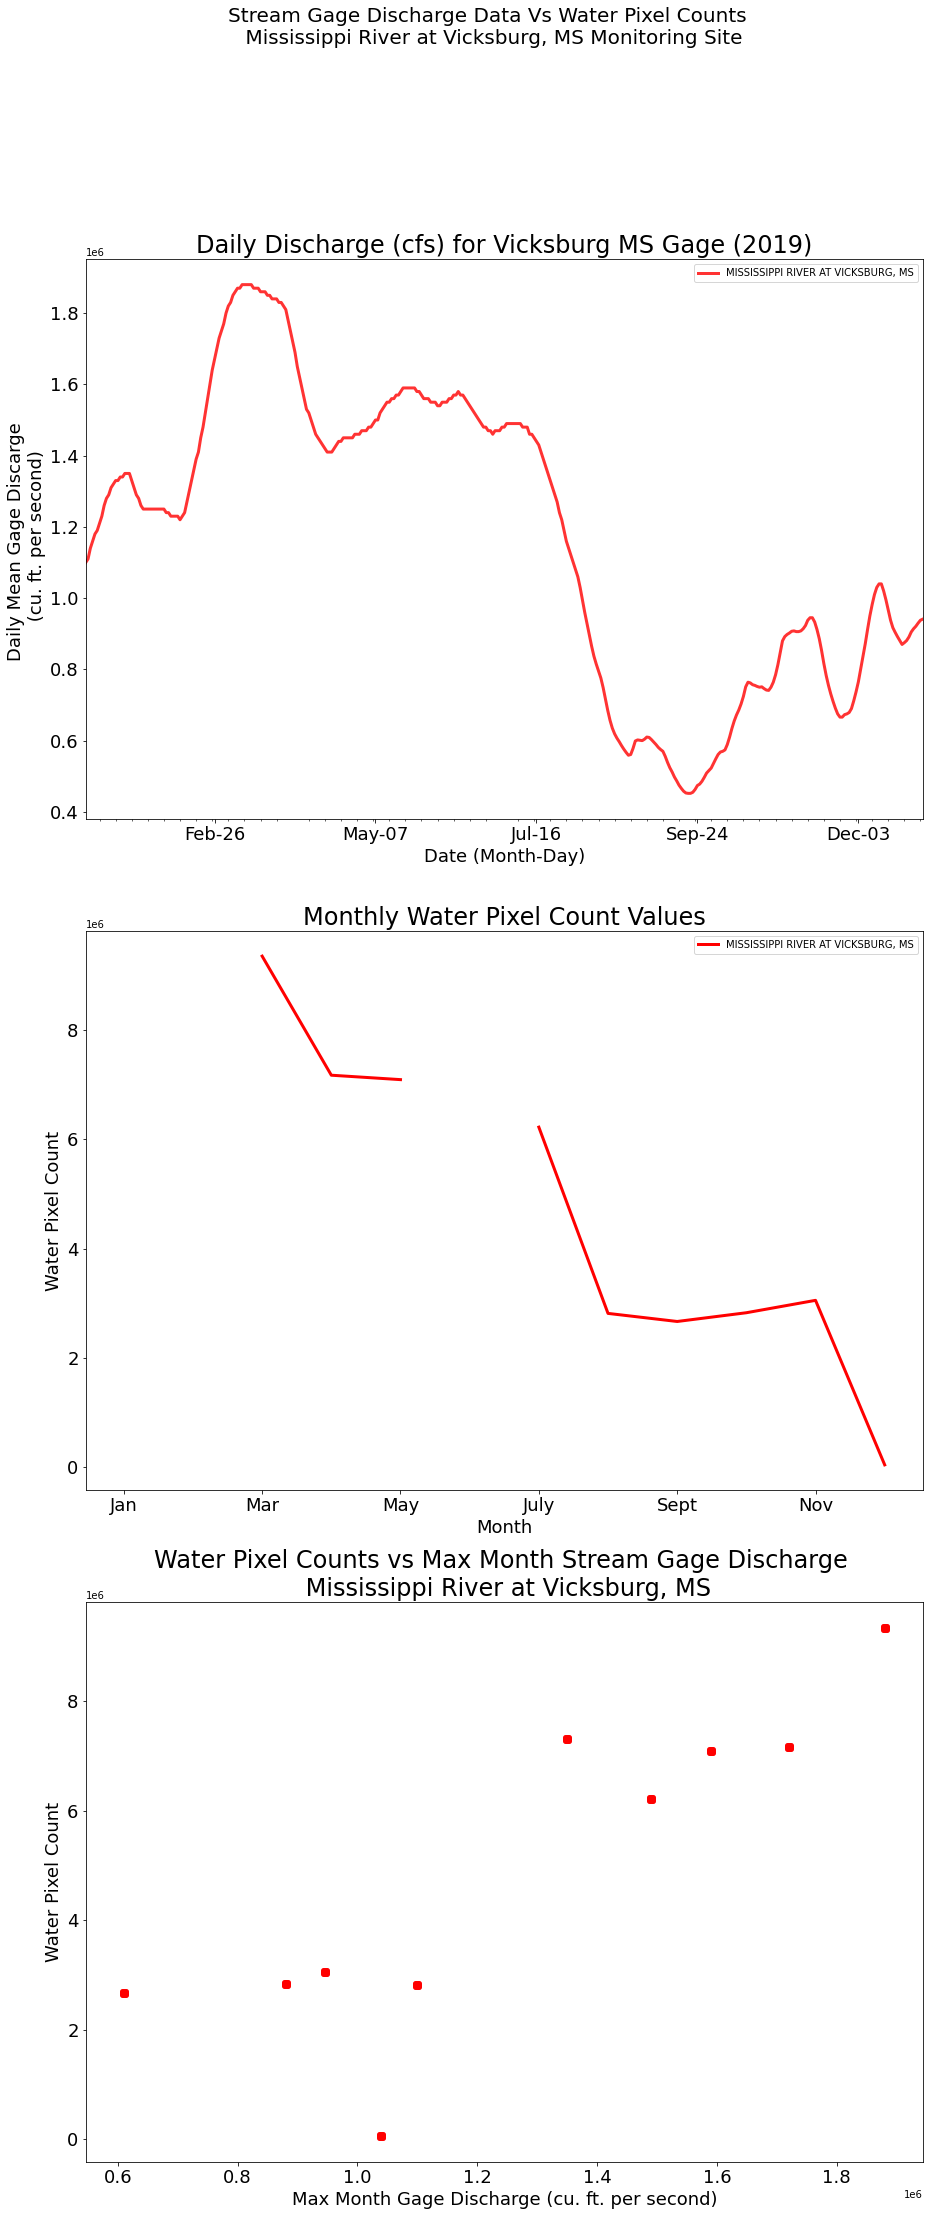

In [49]:
# Define plot space, overall size and title
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 35))

fig.suptitle(
    "Stream Gage Discharge Data Vs Water Pixel Counts \n Mississippi River at Vicksburg, MS Monitoring Site", fontsize=20)

# Loop for plotting Subplot 1
vicksburg_site_df.plot(y='discharge',
                       title="Daily Discharge (cfs) for Vicksburg MS Gage (2019)",
                       fontsize = 18,
                       label='MISSISSIPPI RIVER AT VICKSBURG, MS',
                       linewidth=3.0,
                       ax=ax1,
                       color='red',
                       alpha=.8)
df.plot(y='nd',
        ax=ax2,
        title="Monthly Water Pixel Count Values",
        fontsize = 18,
        label="MISSISSIPPI RIVER AT VICKSBURG, MS",
        color='red',
        linewidth=3.0)

vicksburg_max_month_gage.plot(kind='scatter',
                              x='discharge',
                              y='pixel_count',
                              color='red',
                              marker=',',
                              fontsize = 18,
                              linewidth=5.0,
                              title="Water Pixel Counts vs Max Month Stream Gage Discharge \n Mississippi River at Vicksburg, MS",
                              ax=ax3)

# Define the date format for Subplot 1, set axis labels
date_form = DateFormatter("%b-%d")
ax1.xaxis.set_major_formatter(date_form)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=10))
ax1.set(xlabel="Date (Month-Day)",
        ylabel="Daily Mean Gage Discarge \n (cu. ft. per second)")
ax2.set(xlabel="Month",
        ylabel="Water Pixel Count"
       )
ax3.set(xlabel = 'Max Month Gage Discharge (cu. ft. per second)',
       ylabel = "Water Pixel Count")
ax1.title.set_size(24)
ax2.title.set_size(24)
ax3.title.set_size(24)
ax1.xaxis.label.set_size(18)
ax1.yaxis.label.set_size(18)
ax2.xaxis.label.set_size(18)
ax2.yaxis.label.set_size(18)
ax3.xaxis.label.set_size(18)
ax3.yaxis.label.set_size(18)


# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 11})